<a href="https://colab.research.google.com/github/BaduA/carpriceprediction/blob/main/carprediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [75]:
import tensorflow as tf
import pandas as pd
import seaborn as sns
from tensorflow.keras.layers import Normalization, Dense, InputLayer
from tensorflow.keras.losses import MeanSquaredError, Huber, MeanAbsoluteError
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

**Data Preperation**

In [ ]:
data = pd.read_csv("train.csv",",")
data.head()

In [ ]:
data.shape

(1000, 12)

In [ ]:
tensor_data = tf.constant(data)
tensor_data = tf.random.shuffle(tensor_data)


In [ ]:
X = tensor_data[:,3:-1]
Y = tensor_data[:,-1]
Y = tf.expand_dims(Y, axis = -1)

In [43]:
TRAIN_RATIO = 0.8
VAL_RATIO = 0.1
TEST_RATIO = 0.1
DATASET_SIZE = len(X)

In [55]:
X_train = X[:int(DATASET_SIZE*TRAIN_RATIO)]
Y_train = Y[:int(DATASET_SIZE*TRAIN_RATIO)]

X_val = X[int(DATASET_SIZE*TRAIN_RATIO):-int(DATASET_SIZE*VAL_RATIO)]
Y_val = Y[int(DATASET_SIZE*TRAIN_RATIO):-int(DATASET_SIZE*VAL_RATIO)]
print(X_val.shape)

X_test = X[-int(DATASET_SIZE*TEST_RATIO):]
Y_test = Y[-int(DATASET_SIZE*TEST_RATIO):]


(100, 8)


In [ ]:
normalizer = Normalization()
normalizer.adapt(X_train)
normalizer(X_train)[:5]

In [ ]:
from keras.api._v2.keras import activations
model = tf.keras.Sequential()
model.add(InputLayer(input_shape = (8,)))
model.add(normalizer)
model.add(Dense(96, activation="relu"))
model.add(Dense(64, activation="relu"))
model.add(Dense(32, activation="relu"))
model.add(Dense(1))
model.summary()

In [ ]:
tf.keras.utils.plot_model(model,to_file ="model.png",show_shapes=True)

In [77]:
model.compile(optimizer = Adam(learning_rate=0.1),loss = MeanAbsoluteError())

In [ ]:
history = model.fit(X_train,Y_train,validation_data=(X_val,Y_val),epochs = 100,verbose=0)

In [71]:
model.evaluate(X,Y)

32/32 [==============================] - 0s 2ms/step - loss: 21451.4980


21451.498046875

In [72]:
model.predict(X_test[1])


1/1 [==============================] - 0s 121ms/step


array([[232791.92]], dtype=float32)

In [73]:
print(Y_test[1])

tf.Tensor([178520.], shape=(1,), dtype=float64)


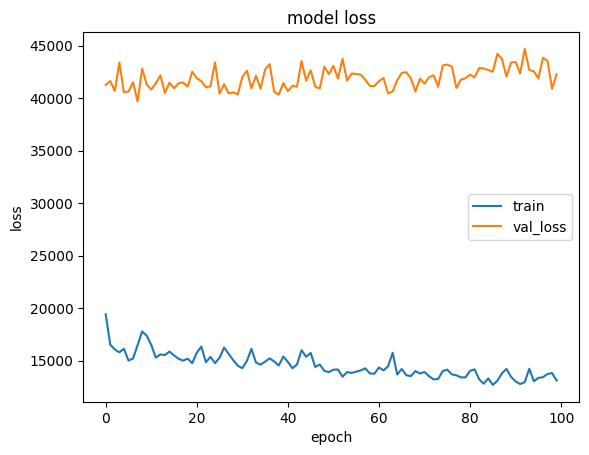

In [79]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("model loss")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend(["train","val_loss"])
plt.show()